# Linear Regression VS Ridge VS  SVR VS RandomForest  - Using SKLearn


In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn.linear_model  as LR
import sklearn.svm as SM
import sklearn.ensemble as RF

import sklearn.metrics as M


<H1>Read Data from CSV

In [2]:
dfTrain = pd.read_csv('../input/LinearRegressionDS/LinearRegressionTrainingData.csv')   #Training Dataset
dfTest = pd.read_csv('../input/LinearRegressionDS/LinearRegressionTestData.csv')   #Test Dataset
dfValid = pd.read_csv('../input/LinearRegressionDS/LinearRegressionValidData.csv') #Validation Dataset
dfTrain.head()

,X,Y
0,-15.936758,2.134311
1,-29.152979,1.173257
2,36.189549,34.359109
3,37.492187,36.837955
4,-48.058829,2.808965


<h5> Visualize Data

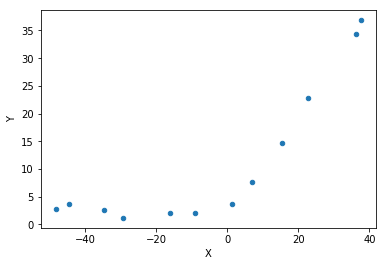

In [3]:
dfTrain.plot(x='X',y='Y',kind='scatter')

<h2>Extract Input Feature to <b>X </b>and Label to <b>y</b>

In [4]:
def extractFeatures(df):
    df_Features=df.iloc[:,0:1]
    df_Label=df.iloc[:,1:2]
    X=df_Features.values
    Y=df_Label.values
    return X,Y

In [5]:
X,Y=extractFeatures(dfTrain)
Xval,Yval=extractFeatures(dfValid)
Xtest,Ytest=extractFeatures(dfTest)

# Helper Functions

In [12]:
def mapFeature(X,degree,includeBiasVector=True):
    
    sz=X.shape[1]
    if (sz==2):
        sz=(degree+1)*(degree+2)/2
        sz=int(sz)
    else:
         sz=degree+1

    out=np.ones((X.shape[0],sz))

    sz=X.shape[1]
    if (sz==2):
        X1=X[:, 0:1]
        X2=X[:, 1:2]
        col=1
        for i in range(1,degree+1):        
            for j in range(0,i+1):
                out[:,col:col+1]= np.multiply(np.power(X1,i-j),np.power(X2,j))    
                col+=1
        return out
    else:
        for i in range(1,degree+1):        
            out[:,i:i+1]= np.power(X,i)
    if (includeBiasVector==False):
        out=out[:,1:] #Remove Bias Vector

    return out

In [8]:
def SKLearnRegression(Xtrain, ytrain,degree,regAlpha,algorithm):
    Xp=mapFeature(Xtrain,degree,False)    #Polynomial  
    if (algorithm=="Linear"):
        RegObj=LR.LinearRegression(normalize=True).fit(Xp,ytrain)
    elif (algorithm=="Ridge"):
        RegObj=LR.Ridge(alpha=regAlpha,normalize=True).fit(Xp,ytrain)
    elif (algorithm=="SVR"):
        RegObj=SM.SVR(degree=degree).fit(Xp,ytrain)
    elif (algorithm=="RandomForest"):
        RegObj=RF.RandomForestRegressor().fit(Xp,ytrain)
    else:
        RegObj=LR.LinearRegression(normalize=True).fit(Xp,ytrain)
    return RegObj


In [16]:
def SKLearnPredict(RegObj,X,degree):
    Xp=mapFeature(X,degree,False)    #Polynomial  
    Py=RegObj.predict(Xp)
    return Py

In [17]:
def SKLearnMSE(y_Actual,y_Predicted):
    MSE= M.mean_squared_error(y_Actual, y_Predicted)
    return MSE

In [14]:
def SKLearnPlotHypothesis(RegObj,X,y,degree,regAlpha):
    plt.scatter(X,y) 
    plt.title("Alpha="+str(regAlpha)+",Degree="+str(degree))
    x_min, x_max = X[:, 0].min()-1 , X[:, 0].max()+1 
    u = np.linspace(x_min, x_max, 100)
    u.shape=(len(u),1) 
    v=SKLearnPredict(RegObj,u,degree) 
    plt.plot(u, v,color='r')
    return

# Linear Regression

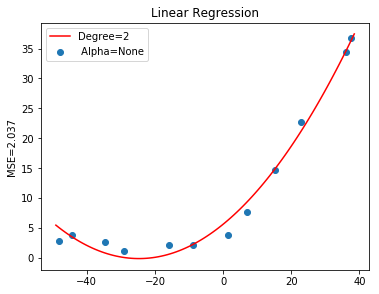

In [22]:
plt.figure(figsize=(20,10))
regAlpha=None
degree=2
RegObj=SKLearnRegression(X,Y,degree,regAlpha,"Linear")
plt.subplot(231)
SKLearnPlotHypothesis(RegObj,X,Y,degree,regAlpha)
predicted_y=SKLearnPredict(RegObj,X,degree)      
MSE1=SKLearnMSE(Y,predicted_y)
plt.title("Linear Regression")
plt.ylabel("MSE="+str(round(MSE1,3)) )
plt.legend(("Degree="+str(degree)," Alpha="+str(regAlpha)))
plt.show()

# Ridge Regression

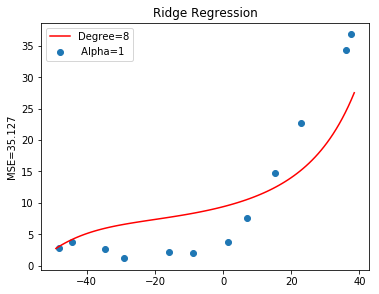

In [24]:
plt.figure(figsize=(20,10))
regAlpha=1
degree=8
RegObj=SKLearnRegression(X,Y,degree,regAlpha,"Ridge")
plt.subplot(232)
SKLearnPlotHypothesis(RegObj,X,Y,degree,regAlpha)
predicted_y=SKLearnPredict(RegObj,X,degree)      
MSE2=SKLearnMSE(Y,predicted_y)
plt.title("Ridge Regression")
plt.ylabel("MSE="+str(round(MSE2,3)))
plt.legend(("Degree="+str(degree)," Alpha="+str(regAlpha)))
plt.show()

# SVR Regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


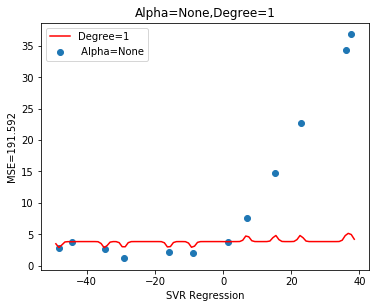

In [29]:
plt.figure(figsize=(20,10))
regAlpha=None
degree=1
RegObj=SKLearnRegression(X,Y.flatten(),degree,regAlpha,"SVR")
plt.subplot(234)
SKLearnPlotHypothesis(RegObj,X,Y,degree,regAlpha)
predicted_y=SKLearnPredict(RegObj,X,degree)      
MSE3=SKLearnMSE(Y,predicted_y)
plt.xlabel("SVR Regression")
plt.ylabel("MSE="+str(round(MSE3,3))) 
plt.legend(("Degree="+str(degree)," Alpha="+str(regAlpha)))
plt.show()

# Random Forest Regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


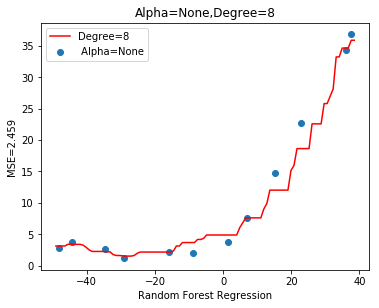

In [31]:
plt.figure(figsize=(20,10))
regAlpha=None
degree=8
RegObj=SKLearnRegression(X,Y.flatten(),degree,regAlpha,"RandomForest")
plt.subplot(235)
SKLearnPlotHypothesis(RegObj,X,Y,degree,regAlpha)
predicted_y=SKLearnPredict(RegObj,X,degree)      
MSE4=SKLearnMSE(Y,predicted_y)
plt.xlabel("Random Forest Regression") 
plt.ylabel("MSE="+str(round(MSE4,3))) 
plt.legend(("Degree="+str(degree)," Alpha="+str(regAlpha)))
plt.show()

# Final Plot and Test Error

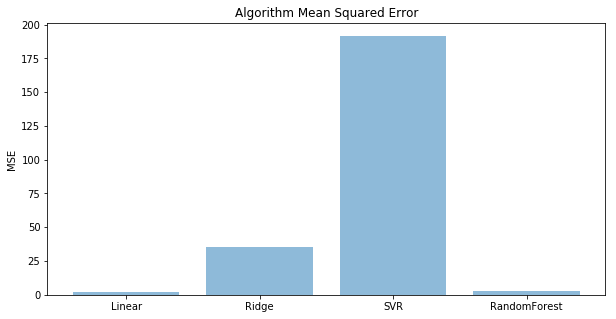

In [33]:
plt.figure(figsize=(10,5))
AlgoNames = ('Linear', 'Ridge', 'SVR', 'RandomForest')
AlgoIndex = [1,2,3,4]
AlgoMSE = [MSE1,MSE2,MSE3,MSE4]
plt.bar(AlgoIndex, AlgoMSE, align='center', alpha=0.5)
plt.xticks(AlgoIndex, AlgoNames)
plt.ylabel('MSE')
plt.title('Algorithm Mean Squared Error')
plt.show()
